In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Loading Data

In [78]:
cat_data = pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")
train_data = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
items_data = pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
shops_data = pd.read_csv("../input/competitive-data-science-predict-future-sales/shops.csv")
test_data = pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")

## EDA

In [79]:
cat_data.head()  # rows*columns: 84 * 2 
# car_data.count()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [80]:
cat_data.isnull().sum()

item_category_name    0
item_category_id      0
dtype: int64

In [81]:
train_data.head() # 2935849*6
# train_data.count()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [82]:
train_data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [83]:
train_data.info

<bound method DataFrame.info of                date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1

In [84]:
train_data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [85]:
items_data.head() # 22170 * 3
# items_data.count()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [86]:
shops_data.head() # 60* 2
# shops_data.count()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [87]:
test_data.head() #214200 * 3
# test_data.count()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [88]:
train = train_data.merge(shops_data,on = ['shop_id'],how = 'right')
train = train.merge(items_data, on = ['item_id'],how='right')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2936212 entries, 0 to 2936211
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   date_block_num    float64
 2   shop_id           float64
 3   item_id           int64  
 4   item_price        float64
 5   item_cnt_day      float64
 6   shop_name         object 
 7   item_name         object 
 8   item_category_id  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 224.0+ MB


In [89]:
train.isnull().sum()

date                363
date_block_num      363
shop_id             363
item_id               0
item_price          363
item_cnt_day        363
shop_name           363
item_name             0
item_category_id      0
dtype: int64

In [90]:
train = train.dropna()

In [91]:
train.isnull().sum()

date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
shop_name           0
item_name           0
item_category_id    0
dtype: int64

In [92]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id
0,01.09.2014,20.0,54.0,0,58.0,1.0,"Химки ТЦ ""Мега""",! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40
1,04.04.2014,15.0,55.0,1,4490.0,1.0,Цифровой склад 1С-Онлайн,!ABBYY FineReader 12 Professional Edition Full...,76
2,02.04.2014,15.0,55.0,1,4490.0,1.0,Цифровой склад 1С-Онлайн,!ABBYY FineReader 12 Professional Edition Full...,76
3,06.07.2014,18.0,55.0,1,4490.0,1.0,Цифровой склад 1С-Онлайн,!ABBYY FineReader 12 Professional Edition Full...,76
4,04.08.2014,19.0,55.0,1,4490.0,1.0,Цифровой склад 1С-Онлайн,!ABBYY FineReader 12 Professional Edition Full...,76


In [93]:
train['date'] = pd.to_datetime(train['date'])
train['month'] = train['date'].dt.month
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,month
0,2014-01-09,20.0,54.0,0,58.0,1.0,"Химки ТЦ ""Мега""",! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40,1
1,2014-04-04,15.0,55.0,1,4490.0,1.0,Цифровой склад 1С-Онлайн,!ABBYY FineReader 12 Professional Edition Full...,76,4
2,2014-02-04,15.0,55.0,1,4490.0,1.0,Цифровой склад 1С-Онлайн,!ABBYY FineReader 12 Professional Edition Full...,76,2
3,2014-06-07,18.0,55.0,1,4490.0,1.0,Цифровой склад 1С-Онлайн,!ABBYY FineReader 12 Professional Edition Full...,76,6
4,2014-04-08,19.0,55.0,1,4490.0,1.0,Цифровой склад 1С-Онлайн,!ABBYY FineReader 12 Professional Edition Full...,76,4
...,...,...,...,...,...,...,...,...,...,...
2936207,2013-09-13,8.0,12.0,22168,799.0,1.0,Интернет-магазин ЧС,Яйцо для Little Inu,62,9
2936208,2013-02-17,1.0,16.0,22168,799.0,1.0,"Коломна ТЦ ""Рио""",Яйцо для Little Inu,62,2
2936209,2013-02-02,1.0,42.0,22168,799.0,1.0,"СПб ТК ""Невский Центр""",Яйцо для Little Inu,62,2
2936210,2013-08-03,2.0,43.0,22168,798.5,1.0,"СПб ТК ""Сенная""",Яйцо для Little Inu,62,8


Text(0.5, 1.0, 'Total sales per month')

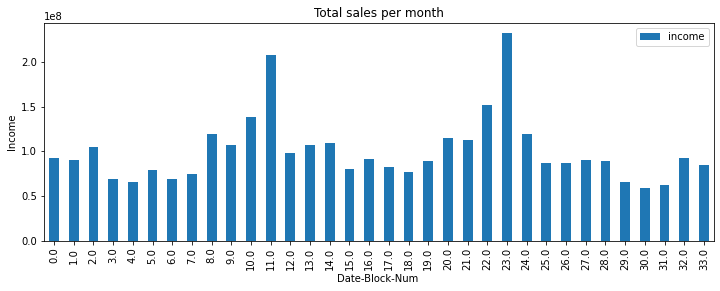

In [94]:
# income for each item price with per day
train['income'] = train['item_cnt_day'] * train['item_price']
train_sales_month = train.groupby('date_block_num',as_index=False)['income'].sum()

train_sales_month.plot(x='date_block_num', y = 'income', kind = 'bar',figsize=(12,4));
plt.xlabel('Date-Block-Num ')
plt.ylabel('Income')
plt.title("Total sales per month")